In [1]:
import numpy as np 
import pandas as pd 
import spacy 

from pickle import dump, load 
from sklearn.model_selection import train_test_split
from keras.models import Sequential
from keras.layers import Embedding, LSTM, Dense, GRU, Dropout
from keras.utils import to_categorical
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences

In [2]:
data = pd.read_csv('shakespeare_data.csv')
data.head()

,Dataline,Play,PlayerLinenumber,ActSceneLine,Player,PlayerLine
0,1,Henry IV,NaN,NaN,NaN,ACT I
1,2,Henry IV,NaN,NaN,NaN,SCENE I. London. The palace.
2,3,Henry IV,NaN,NaN,NaN,"Enter KING HENRY, LORD JOHN OF LANCASTER, the ..."
3,4,Henry IV,1.0,1.1.1,KING HENRY IV,"So shaken as we are, so wan with care,"
4,5,Henry IV,1.0,1.1.2,KING HENRY IV,"Find we a time for frighted peace to pant,"


In [3]:
play_lines = data['PlayerLine']
play_lines.head()

0                                                ACT I
1                         SCENE I. London. The palace.
2    Enter KING HENRY, LORD JOHN OF LANCASTER, the ...
3               So shaken as we are, so wan with care,
4           Find we a time for frighted peace to pant,
Name: PlayerLine, dtype: object

In [4]:
play_lines.dropna(inplace=True)
play_lines.shape

(111396,)

In [5]:
play_lines = play_lines[play_lines.str.len() > 2]
play_lines.shape

(111389,)

In [6]:
text = ' '.join(play_lines[:10000]) # Use only the first 10,000 lines for training
print(text[:1000]) #print first 1000 characters of the text

ACT I SCENE I. London. The palace. Enter KING HENRY, LORD JOHN OF LANCASTER, the EARL of WESTMORELAND, SIR WALTER BLUNT, and others So shaken as we are, so wan with care, Find we a time for frighted peace to pant, And breathe short-winded accents of new broils To be commenced in strands afar remote. No more the thirsty entrance of this soil Shall daub her lips with her own children's blood, Nor more shall trenching war channel her fields, Nor bruise her flowerets with the armed hoofs Of hostile paces: those opposed eyes, Which, like the meteors of a troubled heaven, All of one nature, of one substance bred, Did lately meet in the intestine shock And furious close of civil butchery Shall now, in mutual well-beseeming ranks, March all one way and be no more opposed Against acquaintance, kindred and allies: The edge of war, like an ill-sheathed knife, No more shall cut his master. Therefore, friends, As far as to the sepulchre of Christ, Whose soldier now, under whose blessed cross We are

In [7]:
nlp = spacy.load('en_core_web_md', disable=['parser', 'ner', 'tagger'])
nlp.max_length = 5000000 # set max length to avoid truncation

In [8]:
import re

def is_valid_line(line):
    line = line.strip().lower()
    
    # Remove empty lines
    if len(line) < 3:
        return False
    
    # Remove known stage directions
    if re.match(r'^(scene|act|enter|exeunt|exit|manet)', line):
        return False

    # Remove lines in brackets or all uppercase (common for directions)
    if line.startswith('[') or line.startswith('('):
        return False
    if line.upper() == line and len(line.split()) < 5:
        return False

    return True

In [9]:
clean_lines = [line for line in play_lines if is_valid_line(line)]
clean_lines[0:10] # Display first 10 cleaned lines

['So shaken as we are, so wan with care,',
 'Find we a time for frighted peace to pant,',
 'And breathe short-winded accents of new broils',
 'To be commenced in strands afar remote.',
 'No more the thirsty entrance of this soil',
 "Shall daub her lips with her own children's blood,",
 'Nor more shall trenching war channel her fields,',
 'Nor bruise her flowerets with the armed hoofs',
 'Of hostile paces: those opposed eyes,',
 'Which, like the meteors of a troubled heaven,']

In [347]:
text = ' '.join(clean_lines) # Use only the first 10,000 cleaned lines for training
print(text[:1000]) #print first 1000 characters of the cleaned text

So shaken as we are, so wan with care, Find we a time for frighted peace to pant, And breathe short-winded accents of new broils To be commenced in strands afar remote. No more the thirsty entrance of this soil Shall daub her lips with her own children's blood, Nor more shall trenching war channel her fields, Nor bruise her flowerets with the armed hoofs Of hostile paces: those opposed eyes, Which, like the meteors of a troubled heaven, All of one nature, of one substance bred, Did lately meet in the intestine shock And furious close of civil butchery Shall now, in mutual well-beseeming ranks, March all one way and be no more opposed Against acquaintance, kindred and allies: The edge of war, like an ill-sheathed knife, No more shall cut his master. Therefore, friends, As far as to the sepulchre of Christ, Whose soldier now, under whose blessed cross We are impressed and engaged to fight, Forthwith a power of English shall we levy, Whose arms were moulded in their mothers' womb To chase

In [348]:
import string

def clean_text(doc_text):
    return [
        token.text.lower().strip(string.punctuation)
        for token in nlp(doc_text)
        if not token.is_space and not token.is_punct
    ]

In [349]:
tokens = clean_text(text)
tokens

c:\Users\Gauriel\Gabikir99\Desktop\UPDATED_NLP_COURSE\.conda\lib\site-packages\spacy\pipeline\lemmatizer.py:211: UserWarning: [W108] The rule-based lemmatizer did not find POS annotation for one or more tokens. Check that your pipeline includes components that assign token.pos, typically 'tagger'+'attribute_ruler' or 'morphologizer'.
  warnings.warn(Warnings.W108)


['so',
 'shaken',
 'as',
 'we',
 'are',
 'so',
 'wan',
 'with',
 'care',
 'find',
 'we',
 'a',
 'time',
 'for',
 'frighted',
 'peace',
 'to',
 'pant',
 'and',
 'breathe',
 'short',
 'winded',
 'accents',
 'of',
 'new',
 'broils',
 'to',
 'be',
 'commenced',
 'in',
 'strands',
 'afar',
 'remote',
 'no',
 'more',
 'the',
 'thirsty',
 'entrance',
 'of',
 'this',
 'soil',
 'shall',
 'daub',
 'her',
 'lips',
 'with',
 'her',
 'own',
 'children',
 's',
 'blood',
 'nor',
 'more',
 'shall',
 'trenching',
 'war',
 'channel',
 'her',
 'fields',
 'nor',
 'bruise',
 'her',
 'flowerets',
 'with',
 'the',
 'armed',
 'hoofs',
 'of',
 'hostile',
 'paces',
 'those',
 'opposed',
 'eyes',
 'which',
 'like',
 'the',
 'meteors',
 'of',
 'a',
 'troubled',
 'heaven',
 'all',
 'of',
 'one',
 'nature',
 'of',
 'one',
 'substance',
 'bred',
 'did',
 'lately',
 'meet',
 'in',
 'the',
 'intestine',
 'shock',
 'and',
 'furious',
 'close',
 'of',
 'civil',
 'butchery',
 'shall',
 'now',
 'in',
 'mutual',
 'well',
 

In [350]:
# Check how many empty strings exist
empty_tokens = [t for t in tokens if t == '']
print(f"Number of empty tokens: {len(empty_tokens)}")

Number of empty tokens: 0


In [351]:
len(tokens) # Number of tokens in the text

806534

In [355]:
train_len = 50 + 1

text_sequences = []

for i in range(train_len, len(tokens)):
    seq = tokens[i - train_len:i]
    text_sequences.append(seq)

text_sequences = text_sequences[:100_000]

print(f"Number of sequences: {len(text_sequences)}")

Number of sequences: 100000


In [356]:
for seq in text_sequences[:5]:
    print(' '.join(seq))

so shaken as we are so wan with care find we a time for frighted peace to pant and breathe short winded accents of new broils to be commenced in strands afar remote no more the thirsty entrance of this soil shall daub her lips with her own children s blood
shaken as we are so wan with care find we a time for frighted peace to pant and breathe short winded accents of new broils to be commenced in strands afar remote no more the thirsty entrance of this soil shall daub her lips with her own children s blood nor
as we are so wan with care find we a time for frighted peace to pant and breathe short winded accents of new broils to be commenced in strands afar remote no more the thirsty entrance of this soil shall daub her lips with her own children s blood nor more
we are so wan with care find we a time for frighted peace to pant and breathe short winded accents of new broils to be commenced in strands afar remote no more the thirsty entrance of this soil shall daub her lips with her own ch

In [357]:
tokenizer = Tokenizer(num_words=2000, oov_token='UNK') # Initialize the tokenizer with a vocabulary size of 3000
tokenizer.fit_on_texts(text_sequences) # Fit the tokenizer on the sequences
sequences = tokenizer.texts_to_sequences(text_sequences) # Convert sequences to integers
sequences[0] # First sequence converted to integers

[30,
 1,
 26,
 33,
 46,
 30,
 1,
 13,
 413,
 249,
 33,
 7,
 134,
 12,
 1,
 179,
 5,
 1,
 2,
 604,
 862,
 1,
 1,
 6,
 399,
 1690,
 5,
 16,
 1,
 9,
 1,
 1,
 1,
 40,
 59,
 3,
 1,
 1,
 6,
 21,
 1,
 34,
 1,
 58,
 861,
 13,
 58,
 219,
 811,
 17,
 114]

In [358]:
for i in sequences[0]:
    print(f'{i} : {tokenizer.index_word[i]}')

tokenizer.index_word

30 : so
1 : UNK
26 : as
33 : we
46 : are
30 : so
1 : UNK
13 : with
413 : care
249 : find
33 : we
7 : a
134 : time
12 : for
1 : UNK
179 : peace
5 : to
1 : UNK
2 : and
604 : breathe
862 : short
1 : UNK
1 : UNK
6 : of
399 : new
1690 : broils
5 : to
16 : be
1 : UNK
9 : in
1 : UNK
1 : UNK
1 : UNK
40 : no
59 : more
3 : the
1 : UNK
1 : UNK
6 : of
21 : this
1 : UNK
34 : shall
1 : UNK
58 : her
861 : lips
13 : with
58 : her
219 : own
811 : children
17 : s
114 : blood


{1: 'UNK',
 2: 'and',
 3: 'the',
 4: 'i',
 5: 'to',
 6: 'of',
 7: 'a',
 8: 'my',
 9: 'in',
 10: 'that',
 11: 'you',
 12: 'for',
 13: 'with',
 14: 'not',
 15: 'his',
 16: 'be',
 17: 's',
 18: 'is',
 19: 'thou',
 20: 'me',
 21: 'this',
 22: 'but',
 23: 'he',
 24: 'it',
 25: 'thy',
 26: 'as',
 27: 'your',
 28: 'have',
 29: 'will',
 30: 'so',
 31: 'him',
 32: 'what',
 33: 'we',
 34: 'shall',
 35: 'thee',
 36: 'lord',
 37: 'king',
 38: 'all',
 39: 'by',
 40: 'no',
 41: 'our',
 42: 'if',
 43: 'now',
 44: 'on',
 45: 'from',
 46: 'are',
 47: 'll',
 48: 'do',
 49: 'they',
 50: 'or',
 51: 'at',
 52: 'was',
 53: 'then',
 54: 'them',
 55: 'here',
 56: 'their',
 57: 'let',
 58: 'her',
 59: 'more',
 60: 'am',
 61: 'how',
 62: 'come',
 63: 'like',
 64: 'hath',
 65: 'well',
 66: 'good',
 67: 'us',
 68: 'can',
 69: 'when',
 70: 'were',
 71: 'than',
 72: 'henry',
 73: 'would',
 74: 'an',
 75: 'father',
 76: 'o',
 77: 'these',
 78: 'why',
 79: 'may',
 80: 'warwick',
 81: 'there',
 82: 'yet',
 83: 'make',

In [359]:
tokenizer.word_counts

OrderedDict([('so', 28210),
             ('shaken', 53),
             ('as', 34785),
             ('we', 25668),
             ('are', 17192),
             ('wan', 7),
             ('with', 48674),
             ('care', 1437),
             ('find', 2560),
             ('a', 79489),
             ('time', 5368),
             ('for', 49331),
             ('frighted', 66),
             ('peace', 3688),
             ('to', 112958),
             ('pant', 18),
             ('and', 176830),
             ('breathe', 938),
             ('short', 633),
             ('winded', 73),
             ('accents', 23),
             ('of', 111651),
             ('new', 1504),
             ('broils', 281),
             ('be', 47662),
             ('commenced', 80),
             ('in', 68217),
             ('strands', 31),
             ('afar', 236),
             ('remote', 33),
             ('no', 22168),
             ('more', 12581),
             ('the', 171039),
             ('thirsty', 139),
             

In [360]:
def token_coverage(tokenizer, top_n):
    word_counts = tokenizer.word_counts
    sorted_word_counts = sorted(word_counts.items(), key=lambda item: item[1], reverse=True)

    total_token_count = sum(word_counts.values())
    top_token_count = sum(count for word, count in sorted_word_counts[:top_n])

    coverage = (top_token_count / total_token_count) * 100
    print(f"Top {top_n} words cover {coverage:.2f}% of all word occurrences.")
    return coverage


In [361]:
# Assuming tokenizer is already fitted
coverage = token_coverage(tokenizer, top_n=3000)

Top 3000 words cover 92.63% of all word occurrences.


In [362]:
# Assuming tokenizer is already fitted
coverage = token_coverage(tokenizer, top_n=2000)

Top 2000 words cover 89.15% of all word occurrences.


In [363]:
vocab_size = 2000

In [364]:
sequences = np.array(sequences) # Convert sequences to numpy array
sequences[:5] # First 5 sequences

array([[  30,    1,   26,   33,   46,   30,    1,   13,  413,  249,   33,
           7,  134,   12,    1,  179,    5,    1,    2,  604,  862,    1,
           1,    6,  399, 1690,    5,   16,    1,    9,    1,    1,    1,
          40,   59,    3,    1,    1,    6,   21,    1,   34,    1,   58,
         861,   13,   58,  219,  811,   17,  114],
       [   1,   26,   33,   46,   30,    1,   13,  413,  249,   33,    7,
         134,   12,    1,  179,    5,    1,    2,  604,  862,    1,    1,
           6,  399, 1690,    5,   16,    1,    9,    1,    1,    1,   40,
          59,    3,    1,    1,    6,   21,    1,   34,    1,   58,  861,
          13,   58,  219,  811,   17,  114,  138],
       [  26,   33,   46,   30,    1,   13,  413,  249,   33,    7,  134,
          12,    1,  179,    5,    1,    2,  604,  862,    1,    1,    6,
         399, 1690,    5,   16,    1,    9,    1,    1,    1,   40,   59,
           3,    1,    1,    6,   21,    1,   34,    1,   58,  861,   13,
          

In [365]:
X = sequences[:, :-1] # Features (all but last token in each sequence)
y = sequences[:, -1] # Labels (last token in each sequence)
print(X[:5]) # First 5 sequences of features
print('\n')
print(y[:5]) # First 5 labels

[[  30    1   26   33   46   30    1   13  413  249   33    7  134   12
     1  179    5    1    2  604  862    1    1    6  399 1690    5   16
     1    9    1    1    1   40   59    3    1    1    6   21    1   34
     1   58  861   13   58  219  811   17]
 [   1   26   33   46   30    1   13  413  249   33    7  134   12    1
   179    5    1    2  604  862    1    1    6  399 1690    5   16    1
     9    1    1    1   40   59    3    1    1    6   21    1   34    1
    58  861   13   58  219  811   17  114]
 [  26   33   46   30    1   13  413  249   33    7  134   12    1  179
     5    1    2  604  862    1    1    6  399 1690    5   16    1    9
     1    1    1   40   59    3    1    1    6   21    1   34    1   58
   861   13   58  219  811   17  114  138]
 [  33   46   30    1   13  413  249   33    7  134   12    1  179    5
     1    2  604  862    1    1    6  399 1690    5   16    1    9    1
     1    1   40   59    3    1    1    6   21    1   34    1   58  861
    13 

In [366]:
y = to_categorical(y, num_classes=vocab_size) 
print(y.shape)

(100000, 2000)


In [367]:
sequence_len = X.shape[1] # Length of each sequence
print(sequence_len)

50


In [368]:
from keras.optimizers import Adam

def create_model_LSTM(vocab_size, seq_len):
    model = Sequential()
    model.add(Embedding(vocab_size, seq_len, input_length=seq_len))

    model.add(LSTM(128, return_sequences=True))
    model.add(Dropout(0.3))
    model.add(LSTM(64))
    model.add(Dropout(0.3))

    model.add(Dense(128, activation='relu'))
    model.add(Dense(vocab_size, activation='softmax'))

    optimizer = Adam(learning_rate=0.005) 
    model.compile(loss='categorical_crossentropy', optimizer=optimizer, metrics=['accuracy'])

    model.summary()
    return model

In [ ]:
from keras.callbacks import EarlyStopping, ReduceLROnPlateau, ModelCheckpoint

early_stop = EarlyStopping(monitor='val_loss', patience=8, restore_best_weights=True)
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.3, patience=3)
checkpoint = ModelCheckpoint('best_model_lstm.h5', monitor='val_loss', save_best_only=True, save_weights_only=False, verbose=1)

In [374]:
lstm_model = create_model_LSTM(vocab_size, seq_len=sequence_len) # Create LSTM model
history = lstm_model.fit(X, y, epochs=40, batch_size=64, validation_split=0.2, callbacks=[early_stop, reduce_lr, checkpoint], verbose=1)

Model: "sequential_22"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_22 (Embedding)    (None, 50, 50)            100000    
                                                                 
 lstm_42 (LSTM)              (None, 50, 128)           91648     
                                                                 
 dropout_15 (Dropout)        (None, 50, 128)           0         
                                                                 
 lstm_43 (LSTM)              (None, 64)                49408     
                                                                 
 dropout_16 (Dropout)        (None, 64)                0         
                                                                 
 dense_44 (Dense)            (None, 128)               8320      
                                                                 
 dense_45 (Dense)            (None, 2000)            

c:\Users\Gauriel\Gabikir99\Desktop\UPDATED_NLP_COURSE\.conda\lib\site-packages\keras\src\engine\training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


1250/1250 [==============================] - ETA: 0s - loss: 5.4552 - accuracy: 0.1152
Epoch 2: val_loss improved from 5.65625 to 5.50681, saving model to best_model_lstm.h5
1250/1250 [==============================] - 263s 211ms/step - loss: 5.4552 - accuracy: 0.1152 - val_loss: 5.5068 - val_accuracy: 0.1104 - lr: 0.0050
Epoch 3/40
1250/1250 [==============================] - ETA: 0s - loss: 5.3074 - accuracy: 0.1211
Epoch 3: val_loss improved from 5.50681 to 5.47928, saving model to best_model_lstm.h5
1250/1250 [==============================] - 281s 225ms/step - loss: 5.3074 - accuracy: 0.1211 - val_loss: 5.4793 - val_accuracy: 0.1080 - lr: 0.0050
Epoch 4/40
1250/1250 [==============================] - ETA: 0s - loss: 5.2380 - accuracy: 0.1227
Epoch 4: val_loss improved from 5.47928 to 5.42834, saving model to best_model_lstm.h5
1250/1250 [==============================] - 1098s 879ms/step - loss: 5.2380 - accuracy: 0.1227 - val_loss: 5.4283 - val_accuracy: 0.1117 - lr: 0.0050
Epoch

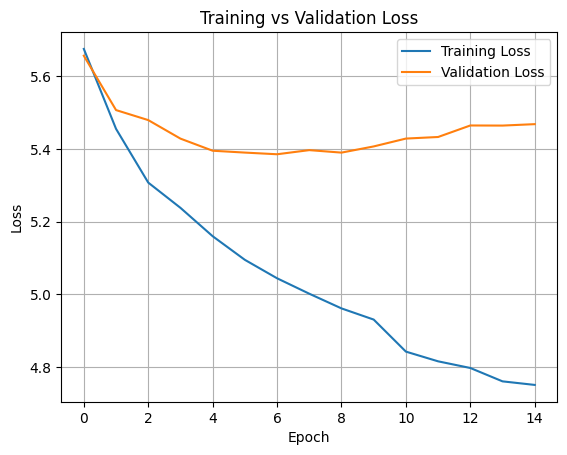

In [375]:
import matplotlib.pyplot as plt

plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Training vs Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)
plt.show()

In [377]:
def create_model_GRU(vocab_size, seq_len):
    model = Sequential()
    model.add(Embedding(vocab_size, seq_len, input_length=seq_len))

    model.add(GRU(128, return_sequences=True))
    model.add(Dropout(0.3))
    model.add(GRU(64))
    model.add(Dropout(0.3))

    model.add(Dense(128, activation='relu'))
    model.add(Dense(vocab_size, activation='softmax'))

    optimizer = Adam(learning_rate=0.005) 
    model.compile(loss='categorical_crossentropy', optimizer=optimizer, metrics=['accuracy'])

    model.summary()
    return model

In [378]:
checkpoint = ModelCheckpoint('best_model_gru.h5', monitor='val_loss', save_best_only=True, save_weights_only=False, verbose=1)

gru_model = create_model_GRU(vocab_size, seq_len=sequence_len) # Create GRU model
history_gru = gru_model.fit(X, y, epochs=40, batch_size=64, validation_split=0.2, callbacks=[early_stop, reduce_lr, checkpoint], verbose=1)

Model: "sequential_23"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_23 (Embedding)    (None, 50, 50)            100000    
                                                                 
 gru_2 (GRU)                 (None, 50, 128)           69120     
                                                                 
 dropout_17 (Dropout)        (None, 50, 128)           0         
                                                                 
 gru_3 (GRU)                 (None, 64)                37248     
                                                                 
 dropout_18 (Dropout)        (None, 64)                0         
                                                                 
 dense_46 (Dense)            (None, 128)               8320      
                                                                 
 dense_47 (Dense)            (None, 2000)            

c:\Users\Gauriel\Gabikir99\Desktop\UPDATED_NLP_COURSE\.conda\lib\site-packages\keras\src\engine\training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


1250/1250 [==============================] - ETA: 0s - loss: 5.7302 - accuracy: 0.1098
Epoch 2: val_loss improved from 5.83415 to 5.82015, saving model to best_model_gru.h5
1250/1250 [==============================] - 182s 146ms/step - loss: 5.7302 - accuracy: 0.1098 - val_loss: 5.8202 - val_accuracy: 0.1036 - lr: 0.0050
Epoch 3/40
1250/1250 [==============================] - ETA: 0s - loss: 5.7137 - accuracy: 0.1098
Epoch 3: val_loss improved from 5.82015 to 5.76934, saving model to best_model_gru.h5
1250/1250 [==============================] - 200s 160ms/step - loss: 5.7137 - accuracy: 0.1098 - val_loss: 5.7693 - val_accuracy: 0.1036 - lr: 0.0050
Epoch 4/40
1250/1250 [==============================] - ETA: 0s - loss: 5.6193 - accuracy: 0.1090
Epoch 4: val_loss improved from 5.76934 to 5.69789, saving model to best_model_gru.h5
1250/1250 [==============================] - 230s 184ms/step - loss: 5.6193 - accuracy: 0.1090 - val_loss: 5.6979 - val_accuracy: 0.1036 - lr: 0.0050
Epoch 5/4